# Week6-7: Thematic Analysis with BERTopic

## install model

In [1]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers -U

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sentence-transformers scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade huggingface_hub

  Obtaining dependency information for huggingface_hub from https://files.pythonhosted.org/packages/61/8c/fbdc0a88a622d9fa54e132d7bf3ee03ec602758658a2db5b339a65be2cfe/huggingface_hub-0.27.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.5/450.5 kB 10.6 MB/s eta 0:00:0000:01
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.5
    Uninstalling huggingface-hub-0.26.5:
      Successfully uninstalled huggingface-hub-0.26.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.47.1 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.13.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade transformers

  Obtaining dependency information for huggingface-hub<1.0,>=0.24.0 from https://files.pythonhosted.org/packages/61/8c/fbdc0a88a622d9fa54e132d7bf3ee03ec602758658a2db5b339a65be2cfe/huggingface_hub-0.27.0-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.27.0-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/22/7a/88e58bb297c22633ed1c9d16029316e5b5ac5ee44012164c2edede599a5e/tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata
  Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
Using cached huggingface_hub-0.27.0-py3-none-any.whl (450 kB)
Using cached tokenizers-0.21.0-cp39-abi3-macosx_11_0_arm64.whl (2.6 MB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
  Attempting uninstall: tokenizers
    Found existing inst

# 1. Thematic analysis Overview

# 1.1 Using BERTopic

In [74]:
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the original dataset with reviews, sentiment, and published_date
df = pd.read_csv('simplified_reviews_with_sentiment.csv')

# Ensure the 'published_date' is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df = df.dropna(subset=['published_date'])

# Load the pre-trained model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the reviews
embeddings = model.encode(df['cleaned_review'].to_list(), show_progress_bar=True)

# Fit the BERTopic model and get topics for each review
topic_model = BERTopic()
topics, _ = topic_model.fit_transform(df['cleaned_review'].to_list(), embeddings)

# Add the topic IDs back to the original DataFrame
df['topic'] = topics

# Get topic information
topic_info = topic_model.get_topic_info()

# Map topic labels and keywords
def get_topic_details(topic_id):
    if topic_id == -1:  # Handle outliers
        return "Outlier", ""
    else:
        # Fetch topic information
        topic_row = topic_info[topic_info['Topic'] == topic_id]
        if topic_row.empty:  # If topic ID does not exist in topic_info
            return "Unknown", "N/A"
        else:
            topic_label = topic_row['Name'].values[0]
            keywords = ", ".join([kw[0] for kw in topic_model.get_topic(topic_id)])
            return topic_label, keywords

# Apply the mapping to add topic labels and keywords
df[['topic_label', 'topic_keywords']] = df['topic'].apply(
    lambda x: pd.Series(get_topic_details(x))
)

# Save the updated DataFrame with topics, labels, and keywords
df.to_csv('thematic_analysis_per_review_with_labels.csv', index=False)
print("Thematic analysis with topics, labels, and keywords saved successfully!")

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Thematic analysis with topics, labels, and keywords saved successfully!


In [101]:
# function for Top 10 Topics
def print_top_topics(topic_model, reviews, sentiment):
    print(f"\nTop 10 Topics for {sentiment.capitalize()} Reviews:")
    topics, _ = topic_model.fit_transform(reviews)
    topic_info = topic_model.get_topic_info().head(11)
    for index, row in topic_info.iterrows():
        print(f"Topic {row['Topic']}: {row['Name']} (Count: {row['Count']})")

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load Model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load Dataset
df = pd.read_csv('thematic_analysis_per_review_with_labels.csv')

# Separate Positive and Negative Reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Create embeddings
positive_embeddings = model.encode(positive_reviews.to_list(), show_progress_bar=True)
negative_embeddings = model.encode(negative_reviews.to_list(), show_progress_bar=True)

# Analyst with BERTopic for Positive Reviews
positive_topic_model = BERTopic()
positive_topic_model.fit(positive_reviews.to_list(), positive_embeddings)

# Analyst with BERTopic for Negative Reviews
negative_topic_model = BERTopic()
negative_topic_model.fit(negative_reviews.to_list(), negative_embeddings)

# print Top 5 Topics for Positive Reviews
print_top_topics(positive_topic_model, positive_reviews, 'positive')

# print Top 5 Topics for Negative Reviews
print_top_topics(negative_topic_model, negative_reviews, 'negative')

Batches:   0%|          | 0/176 [00:00<?, ?it/s]

Batches:   0%|          | 0/137 [00:00<?, ?it/s]


Top 10 Topics for Positive Reviews:
Topic -1: -1_flight_airline_singapore_good (Count: 3187)
Topic 0: 0_food_singapore_airline_service (Count: 308)
Topic 1: 1_airline_singapore_always_service (Count: 274)
Topic 2: 2_sydney_singapore_melbourne_brisbane (Count: 161)
Topic 3: 3_sq_always_flying_crew (Count: 100)
Topic 4: 4_singapore_wheelchair_wife_thank (Count: 99)
Topic 5: 5_food_comfortable_good_seat (Count: 98)
Topic 6: 6_seat_good_flight_comfortable (Count: 91)
Topic 7: 7_movie_film_great_good (Count: 82)
Topic 8: 8_food_staff_good_service (Count: 78)
Topic 9: 9_economy_premium_seat_extra (Count: 78)

Top 10 Topics for Negative Reviews:
Topic -1: -1_flight_singapore_airline_seat (Count: 2501)
Topic 0: 0_seat_bed_leg_flat (Count: 276)
Topic 1: 1_food_flight_service_good (Count: 212)
Topic 2: 2_seat_flight_meal_class (Count: 170)
Topic 3: 3_economy_premium_seat_class (Count: 147)
Topic 4: 4_luggage_bag_baggage_lost (Count: 91)
Topic 5: 5_refund_cancelled_bank_ticket (Count: 81)
Topic 

## 1.1.1 Visualisation all Topics

In [104]:
# Generate Intertopic Distance Map for Positive Reviews
print("Generating Intertopic Distance Map for Positive Reviews...")
positive_map = positive_topic_model.visualize_topics()
positive_map.show()  

# Generate Intertopic Distance Map for Negative Reviews
print("Generating Intertopic Distance Map for Negative Reviews...")
negative_map = negative_topic_model.visualize_topics()
negative_map.show()

Generating Intertopic Distance Map for Positive Reviews...


Generating Intertopic Distance Map for Negative Reviews...


## 1.1.2 Visualisation of Top 15 Topics in Negative and Positive Reviews

In [52]:
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Function to visualize top 15 topics
def visualize_limited_topics(topic_model, num_topics=15, title="Intertopic Distance Map"):
    # Generate intertopic distance map limited to `top_n_topics`
    fig = topic_model.visualize_topics(top_n_topics=num_topics)
    fig.update_layout(
        title=title,
        font=dict(size=14),
        showlegend=False,
        xaxis_title="Dimension 1 (D1)",
        yaxis_title="Dimension 2 (D2)"
    )
    # Save the visualization to a file
    fig.write_image(f"{title.replace(' ', '_').lower()}.png")  # Save as PNG for clarity in reports
    fig.show()

# Generate and visualize for Positive Reviews
print("Generating Intertopic Distance Map for Positive Reviews...")
visualize_limited_topics(positive_topic_model, num_topics=15, title="Top 15 Topics - Positive Reviews")

# Generate and visualize for Negative Reviews
print("Generating Intertopic Distance Map for Negative Reviews...")
visualize_limited_topics(negative_topic_model, num_topics=15, title="Top 15 Topics - Negative Reviews")

Generating Intertopic Distance Map for Positive Reviews...


Generating Intertopic Distance Map for Negative Reviews...


## 1.1.3 Most frequency words 

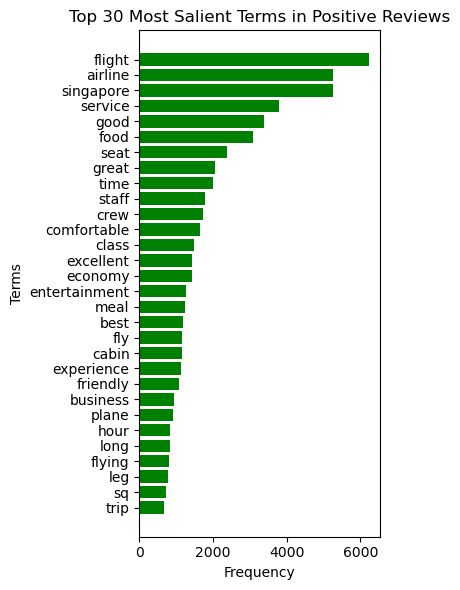

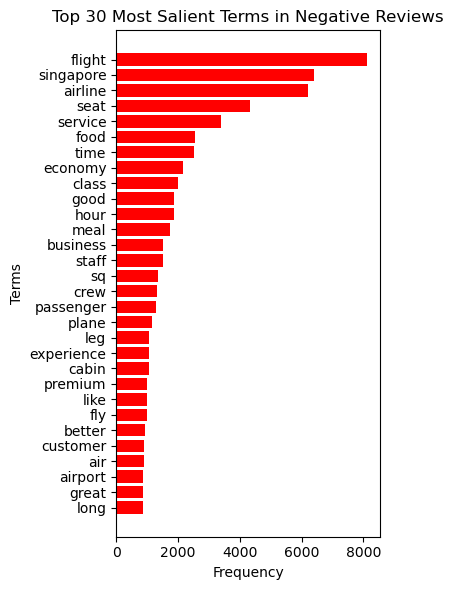

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract top terms
def get_top_terms(reviews, top_n=30):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(reviews)
    word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
    return word_counts.sort_values(by='count', ascending=False).head(top_n)

# Load dataset
df = pd.read_csv('thematic_analysis_per_review.csv')

# Separate reviews by sentiment
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review'].dropna()
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review'].dropna()

# Get top 30 terms for positive and negative reviews
top_positive_terms = get_top_terms(positive_reviews, top_n=30)
top_negative_terms = get_top_terms(negative_reviews, top_n=30)

# Plotting function with color
def plot_top_terms(data, title, color):
    plt.figure(figsize=(4, 6))
    plt.barh(data['word'], data['count'], color=color)
    plt.xlabel('Frequency')
    plt.ylabel('Terms')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot top 30 terms for positive and negative reviews with color coding
plot_top_terms(top_positive_terms, 'Top 30 Most Salient Terms in Positive Reviews', color='green')
plot_top_terms(top_negative_terms, 'Top 30 Most Salient Terms in Negative Reviews', color='red')

# 1.2 Using Zero-Shot Classification for Topic -1 
## by Mapping with Skytrax Criteria

In [100]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm
import logging

# Set up logging for errors
logging.basicConfig(filename="error_log_zero_shot.txt", level=logging.ERROR, format="%(asctime)s - %(message)s")

# Load the dataset
df = pd.read_csv('thematic_analysis_per_review_with_labels.csv')
topic_minus_one_df = df[df['topic'] == -1].reset_index(drop=True)

# Initialize Zero-Shot Classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", multi_label=True)

# Define candidate labels
candidate_labels = [
    "Boarding assistance",
    "Service friendliness / hospitality",
    "Service attentiveness / efficiency",
    "Tickets and refunds",
    "Assisting families",
    "Online booking and check-in services",
    "Baggage delivery",
    "Seat comfort",
    "Cleanliness",
    "Meal service efficiency",
    "Entertainment",
    "Airline Lounge : product facilities"
]

# Add empty columns for results
topic_minus_one_df['predicted_topic'] = None
topic_minus_one_df['confidence'] = None

# Process each review with tqdm (Progress Bar)
for idx, review in tqdm(topic_minus_one_df['cleaned_review'].items(), desc="Classifying topics", total=len(topic_minus_one_df)):
    try:
        # Skip empty reviews
        if not isinstance(review, str) or review.strip() == "":
            topic_minus_one_df.at[idx, 'predicted_topic'] = "General Topic"
            topic_minus_one_df.at[idx, 'confidence'] = 0.0
            continue

        # Run Zero-Shot Classification
        result = classifier(review, candidate_labels)
        topic_minus_one_df.at[idx, 'predicted_topic'] = result['labels'][0]
        topic_minus_one_df.at[idx, 'confidence'] = result['scores'][0]

    except Exception as e:
        # Log error and assign default values
        logging.error(f"Error processing index {idx}: {e}")
        topic_minus_one_df.at[idx, 'predicted_topic'] = "General Topic"
        topic_minus_one_df.at[idx, 'confidence'] = 0.0

# Save the fixed dataset
topic_minus_one_df.to_csv('zero_shot_classified_topic_minus_one_fixed.csv', index=False)
print("\nClassified topics saved successfully as 'zero_shot_classified_topic_minus_one_fixed.csv'")


Classifying topics: 100%|█████████████████| 5696/5696 [1:14:40<00:00,  1.27it/s]


Classified topics saved successfully as 'zero_shot_classified_topic_minus_one_fixed.csv'


In [102]:
import pandas as pd

# Load the dataset
df = pd.read_csv('zero_shot_classified_topic_minus_one_fixed.csv')

# The number of topics was chosen.
print(df['predicted_topic'].value_counts())

predicted_topic
Service attentiveness / efficiency      1945
Service friendliness / hospitality      1442
Seat comfort                            1099
Meal service efficiency                  304
Tickets and refunds                      216
Entertainment                            199
Boarding assistance                      180
Online booking and check-in services     109
Assisting families                        86
Airline Lounge : product facilities       56
Cleanliness                               35
Baggage delivery                          25
Name: count, dtype: int64


In [103]:
# Number of low confidence reviews(less than 0.6)
low_confidence_reviews = df[df['confidence'] < 0.6]
print(f"Number of low confidence reviews: {len(low_confidence_reviews)}")

Number of low confidence reviews: 188


# 1.3 Mapping all topics with Skytrax Criteria

In [109]:
import pandas as pd

# Load datasets
bertopic_df = pd.read_csv('thematic_analysis_per_review_with_labels.csv')
zero_shot_df = pd.read_csv('zero_shot_classified_topic_minus_one_fixed.csv')

# Step 1: Filter reviews where topic != -1
bertopic_mapped_df = bertopic_df[bertopic_df['topic'] != -1].copy()

# Define target topics with associated keywords
target_topics = {
    "Meal service efficiency": ["meal", "food", "drink", "dinner", "service", "meals", "breakfast"],
    "Seat comfort": ["seat", "legroom", "spacious", "comfort", "bed", "flat"],
    "Cleanliness": ["cleanliness", "tidy", "hygiene"],
    "Service friendliness / hospitality": ["service", "friendly", "hospitality", "kind", "racist"],
    "Service attentiveness / efficiency": ["attentive", "efficiency", "crew", "helpful", "staff"],
    "Tickets and refunds": ["ticketing","ticket", "refund", "cancellation", "booking", "change", "redemption"],
    "Baggage delivery": ["baggage", "luggage", "lost", "bag"],
    "Entertainment": ["entertainment", "movies", "movie", "film", "tv", "games"],
    "Online booking and check-in services": ["online", "check-in", "web"],
    "Boarding assistance": ["boarding", "assist", "delayed", "delay", "late"],
    "Airline Lounge : product facilities": ["lounge", "facilities", "airport"],
    "Cabin comfort & amenities" : ["cold", "blanket", "toothbrush", "towel", "pillow","earphone" ],
    "Scoot Airline" : ["scoot"],
    "General Topic": []  # Default topic
}

# Step 2: Map topic_label with target_topics
def map_topic_label(topic_label, target_topics):
    for topic, keywords in target_topics.items():
        if any(keyword in topic_label.lower() for keyword in keywords):
            return topic
    return "General Topic"

# Apply the mapping to the filtered BERTopic DataFrame
bertopic_mapped_df['mapped_topic'] = bertopic_mapped_df['topic_label'].apply(
    lambda x: map_topic_label(str(x), target_topics)
)

# Step 3: Add mapped_topic column to the DataFrame
print(f"BERTopic mapped topics processed: {len(bertopic_mapped_df)} reviews")

# Step 4: Focus on topic-1 in BERTopic and merge with Zero-Shot results
topic_minus_one_df = bertopic_df[bertopic_df['topic'] == -1].copy()

# Merge predicted_topic and confidence from Zero-Shot using matching criteria
merged_topic_minus_one = pd.merge(
    topic_minus_one_df,
    zero_shot_df[['published_date', 'cleaned_review', 'predicted_topic', 'confidence']],
    on=['published_date', 'cleaned_review'],  # Adjust columns if necessary
    how='left'
)

# Step 5: Duplicate predicted_topic into mapped_topic for topic-1 reviews
merged_topic_minus_one['mapped_topic'] = merged_topic_minus_one['predicted_topic']

print(f"Mapped Zero-Shot topics for topic -1: {len(merged_topic_minus_one)} reviews")

# Combine both mapped datasets
final_combined_df = pd.concat([bertopic_mapped_df, merged_topic_minus_one], ignore_index=True)

# Save the final results
final_combined_df.to_csv('final_mapped_topics_results.csv', index=False)
print("Final mapped topics saved successfully as 'final_mapped_topics_results.csv'")


BERTopic mapped topics processed: 4304 reviews
Mapped Zero-Shot topics for topic -1: 5696 reviews
Final mapped topics saved successfully as 'final_mapped_topics_results.csv'


# 2. Thematic analysis by phase

In [117]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_mapped_topics_results.csv')

# Convert 'published_date' to datetime format with proper handling of timezone information
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Remove timezone information to make it timezone-naive
df['published_date'] = df['published_date'].apply(lambda x: x.tz_convert(None) if pd.notnull(x) and x.tzinfo is not None else x)

# Define a function to assign phases based on dates
def assign_phase(date):
    if date < pd.Timestamp('2020-01-31'):
        return 'Pre COVID'
    elif pd.Timestamp('2020-01-31') <= date <= pd.Timestamp('2022-07-31'):
        return 'During COVID'
    else:
        return 'Post COVID'

# Add 'Phase' column
df['Phase'] = df['published_date'].apply(assign_phase)

# Print review counts by phase and sentiment
review_counts = df.groupby(['Phase', 'sentiment']).size().reset_index(name='Review Count')
review_counts['Phase'] = pd.Categorical(review_counts['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)
review_counts = review_counts.sort_values(by=['Phase', 'sentiment'])
print("\nReview Counts by Phase and Sentiment:")
print(review_counts)

# Print all topics in each phase and sentiment
topics_by_phase = (
    df.groupby(['Phase', 'sentiment', 'mapped_topic'])
    .size()
    .reset_index(name='Count')
    .sort_values(by=['Phase', 'sentiment', 'Count'], ascending=[True, True, False])
)
topics_by_phase['Phase'] = pd.Categorical(topics_by_phase['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)
topics_by_phase = topics_by_phase.sort_values(by=['Phase', 'sentiment', 'Count'], ascending=[True, True, False])
print("\nTopics by Phase and Sentiment:")
print(topics_by_phase)

# Add percentage calculation for each topic within the phase
topics_by_phase['Phase Total'] = topics_by_phase.groupby(['Phase', 'sentiment'])['Count'].transform('sum')
topics_by_phase['Percentage'] = (topics_by_phase['Count'] / topics_by_phase['Phase Total']) * 100

# Select top 4 topics for each Phase and Sentiment
top4_topics = (
    topics_by_phase.groupby(['Phase', 'sentiment'])
    .head(4)
    .reset_index(drop=True)
)

# Sort top 4 topics by phase and sentiment
top4_topics['Phase'] = pd.Categorical(top4_topics['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)
top4_topics = top4_topics.sort_values(by=['Phase', 'sentiment', 'Count'], ascending=[True, True, False])

# Save the summarized data
top4_topics.to_csv('top4_topics_per_phase_sentiment.csv', index=False)

# Print the top 4 topics summary for review
print("\nTop 4 Topics by Phase and Sentiment with Percentage:")
print(top4_topics)

# Save all topics data for reference
topics_by_phase.to_csv('all_topics_per_phase_sentiment.csv', index=False)
print("\nAll topics saved as 'all_topics_per_phase_sentiment.csv'")
print("Top 4 topics saved as 'top4_topics_per_phase_sentiment.csv'")


Review Counts by Phase and Sentiment:
          Phase sentiment  Review Count
4     Pre COVID  negative          3049
5     Pre COVID  positive          5003
0  During COVID  negative           633
1  During COVID  positive           420
2    Post COVID  negative           693
3    Post COVID  positive           202

Topics by Phase and Sentiment:
         Phase sentiment                         mapped_topic  Count
63   Pre COVID  negative                         Seat comfort    776
64   Pre COVID  negative   Service attentiveness / efficiency    578
61   Pre COVID  negative              Meal service efficiency    519
65   Pre COVID  negative   Service friendliness / hospitality    367
56   Pre COVID  negative                  Boarding assistance    180
..         ...       ...                                  ...    ...
40  Post COVID  positive  Airline Lounge : product facilities      2
41  Post COVID  positive                   Assisting families      2
52  Post COVID  positive    

## 2.1 Topic by phase Visualization

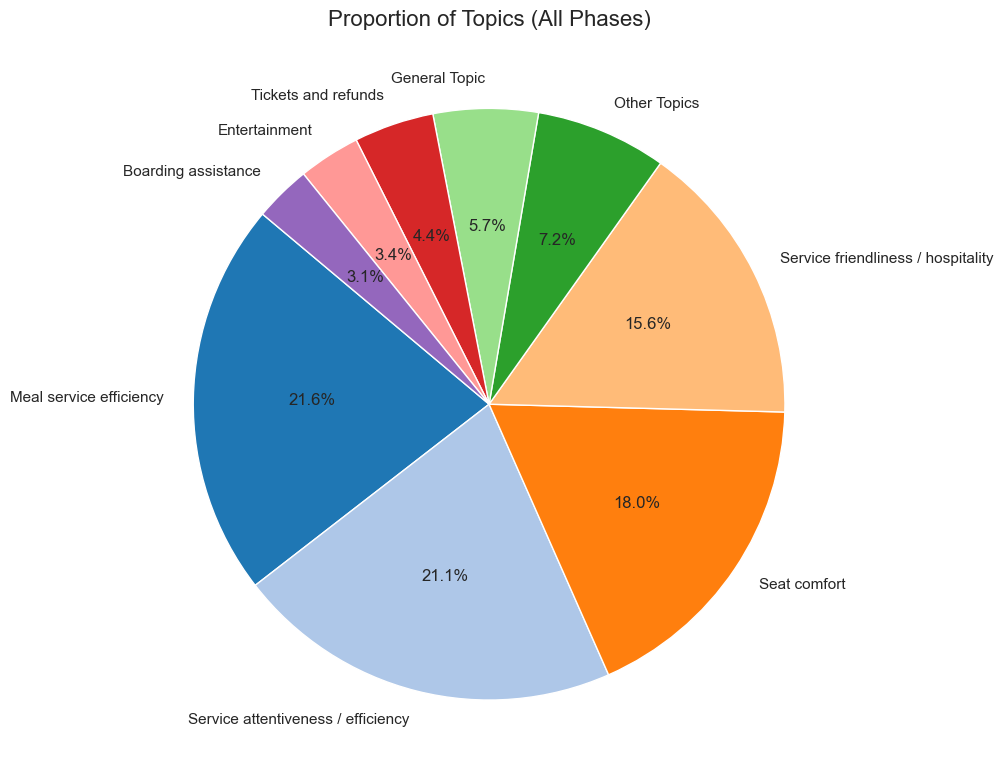

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
all_topics = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Aggregate data to calculate the total count of each topic across all phases and sentiments
topic_proportions = all_topics.groupby('mapped_topic')['Count'].sum().reset_index()

# Calculate total reviews
total_reviews = topic_proportions['Count'].sum()

# Add a percentage column
topic_proportions['Percentage'] = (topic_proportions['Count'] / total_reviews) * 100

# Group topics with less than 2% into "Other Topics"
topic_proportions['mapped_topic'] = topic_proportions.apply(
    lambda row: row['mapped_topic'] if row['Percentage'] >= 2 else 'Other Topics', axis=1
)

# Recalculate counts and percentages after grouping
grouped_proportions = topic_proportions.groupby('mapped_topic', as_index=False).agg(
    Count=('Count', 'sum'),
    Percentage=('Percentage', 'sum')
)

# Sort by count for better visualization
grouped_proportions = grouped_proportions.sort_values(by='Count', ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    grouped_proportions['Count'], 
    labels=grouped_proportions['mapped_topic'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Proportion of Topics (All Phases)', fontsize=16)
plt.tight_layout()
plt.savefig('pie_chart_topic_proportions_with_other.png')
plt.show()

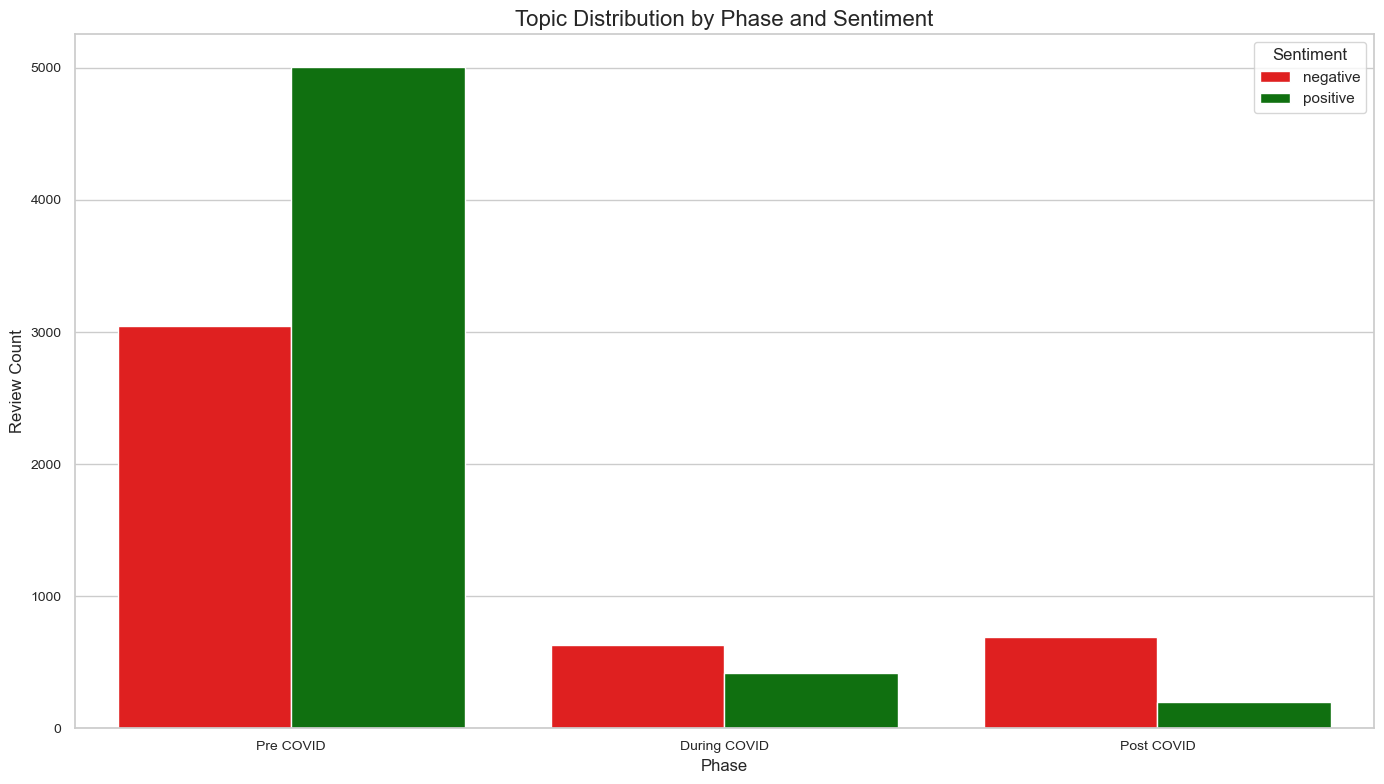

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
all_topics = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Sort the Phase column to ensure correct order
all_topics['Phase'] = pd.Categorical(all_topics['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)

# Set up the plot styles
sns.set(style="whitegrid")

# Define custom colors for sentiments
sentiment_colors = {'negative': 'red', 'positive': 'green'}

# Visualization of top topics distribution by phase and sentiment
plt.figure(figsize=(14, 8))
sns.barplot(
    data=all_topics,
    x='Phase',
    y='Count',
    hue='sentiment',
    ci=None,
    estimator=sum,
    palette=sentiment_colors  # Apply custom colors
)
plt.title('Topic Distribution by Phase and Sentiment', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('topic_distribution_by_phase_sentiment_colored.png')
plt.show()

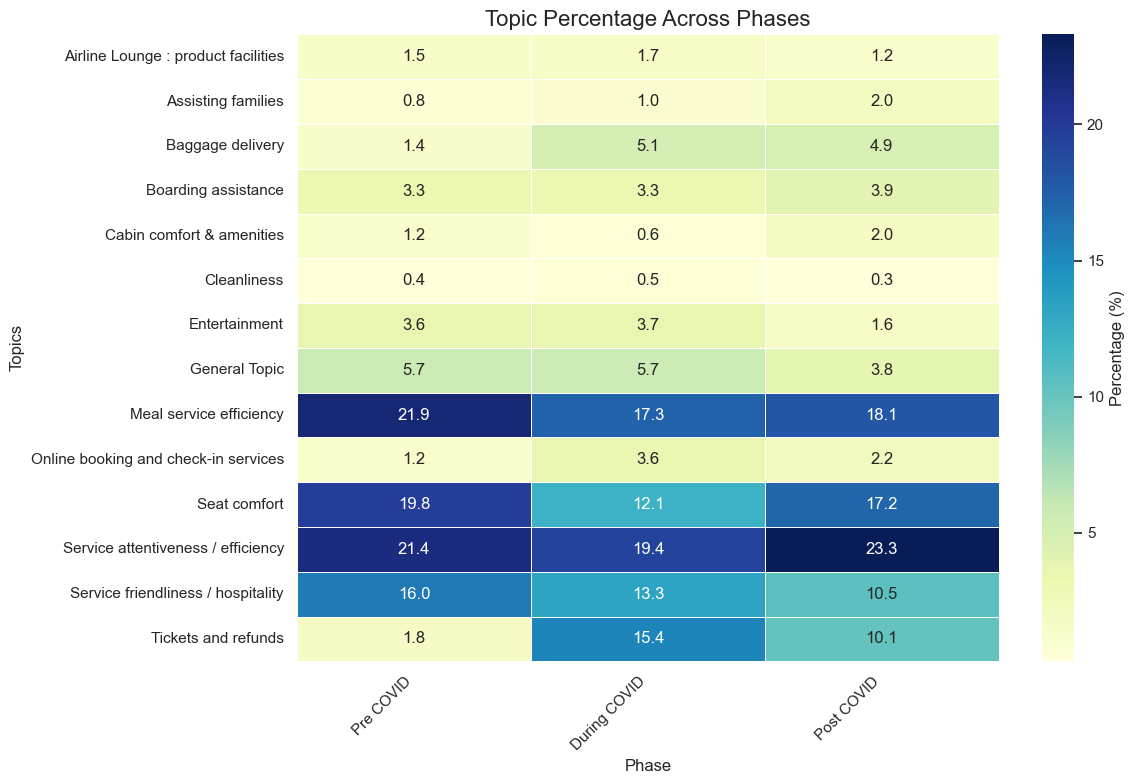

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Ensure 'Phase' is sorted correctly
data['Phase'] = pd.Categorical(data['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)

# Create a pivot table for the heatmap
heatmap_data = (
    data.pivot_table(
        index='mapped_topic', 
        columns='Phase', 
        values='Percentage', 
        aggfunc='mean', 
        fill_value=0
    )
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title('Topic Percentage Across Phases', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Topics', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('heatmap_topics_percentage.png')
plt.show()


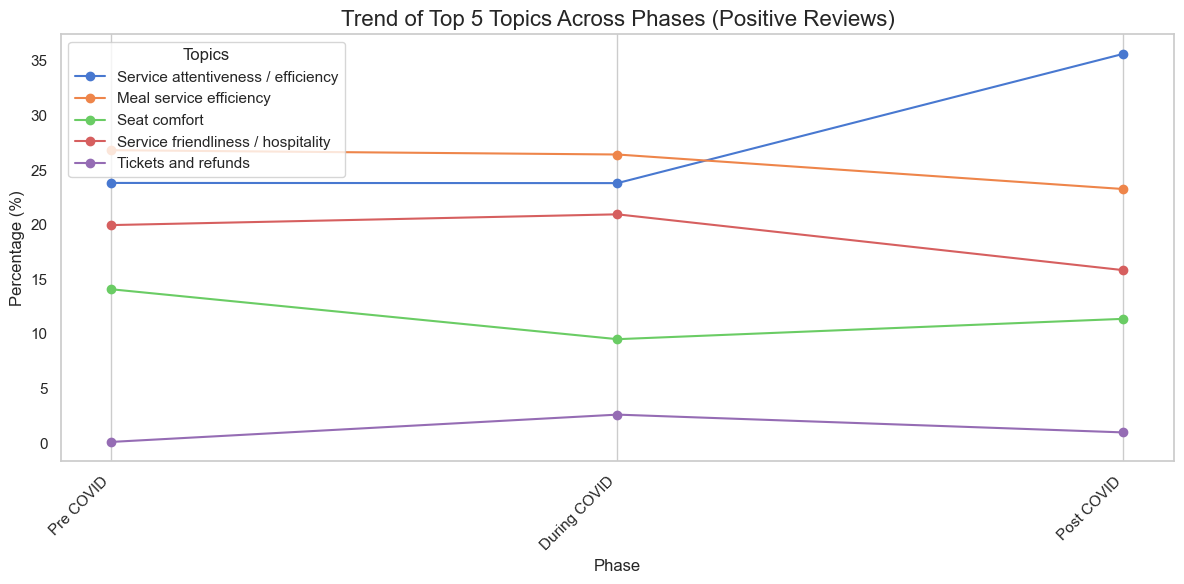

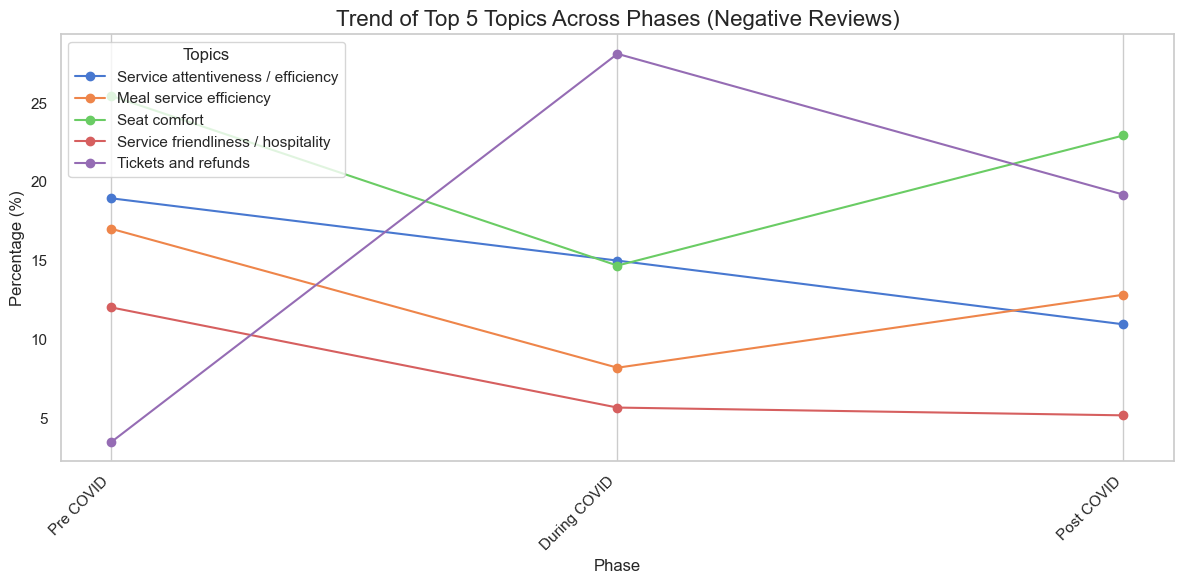

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('all_topics_per_phase_sentiment.csv')

# Ensure 'Phase' is sorted correctly
data['Phase'] = pd.Categorical(data['Phase'], categories=['Pre COVID', 'During COVID', 'Post COVID'], ordered=True)

# Select the top 5 topics overall by average percentage
top5_topics = data.groupby('mapped_topic')['Percentage'].mean().nlargest(5).index

# Filter data for top 5 topics
top_topics_data = data[data['mapped_topic'].isin(top5_topics)]

# Plot line charts separately for positive and negative reviews
sentiments = ['positive', 'negative']

for sentiment in sentiments:
    plt.figure(figsize=(12, 6))
    sentiment_data = top_topics_data[top_topics_data['sentiment'] == sentiment]
    
    # Plot trends for each topic
    for topic in top5_topics:
        topic_data = sentiment_data[sentiment_data['mapped_topic'] == topic]
        plt.plot(
            topic_data['Phase'], 
            topic_data['Percentage'], 
            marker='o', 
            label=f"{topic}"
        )
    
    plt.title(f"Trend of Top 5 Topics Across Phases ({sentiment.capitalize()} Reviews)", fontsize=16)
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.legend(title='Topics', loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.savefig(f'line_chart_top5_topics_{sentiment}.png')
    plt.show()